In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess_ import PointProcessTrain
from PointProcess_ import PointProcessRun
from wasserstein import Cluster
from numpy import array
from scipy import linalg as la

In [185]:
interval_count = 10
PointProcess = PointProcessRun(param_location = 'Trained_Params_70_50.npz')
start_time = start_time = datetime.datetime.fromtimestamp(1465798259)
grid_loc = PointProcess.locs_for_wasserstein (start_time, interval_count, 80)
print (grid_loc)

[[ 3.98236184e+01 -8.62905522e+01  3.70929634e-03]
 [ 3.98358633e+01 -8.62905522e+01  2.55580066e-03]
 [ 3.98236184e+01 -8.62842609e+01  2.52930450e-02]
 ...
 [ 3.97868837e+01 -8.59634043e+01  2.37858048e-03]
 [ 3.97930061e+01 -8.59634043e+01  2.95344832e-03]
 [ 3.98052510e+01 -8.59634043e+01  3.06094343e-03]]


In [186]:
cluster = Cluster(grid_loc, n = 15)
lam = cluster.learn_lam(n_iter = 5, rand_centers = True)
cluster.round_off()
#cluster.process_data_kmeans(False)
centers = cluster.get_centers()

[1.4619477810194204, 175.0]
[1.4363998283608845, 195.0]
[1.3709010643022383, 214.0]
[1.5086109043017588, 232.0]
[1.4095637811110657, 228.0]
Iteration:  3


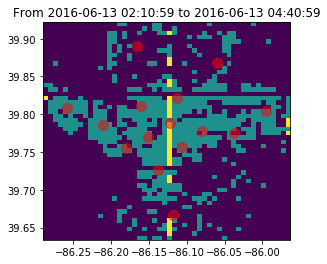

In [187]:
interval_count = 10
bincount = 50
data = grid_loc
end_time = start_time + datetime.timedelta(seconds = 15*60*interval_count)
heatmap, xedges, yedges = np.histogram2d(data[:,1], data[:,0], bins = bincount)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.title ('From {} to {}'.format(str(start_time), str(end_time)))
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.scatter(centers[:,1], centers[:,0], c = 'red', s = 100, alpha = 0.5)
plt.savefig ('wasserstein_graph.png', bbox_inches='tight')
plt.show()
plt.close()


In [188]:
data = cluster.get_data()

[1.4671808742603154, 175.0]
[1.4611969867675023, 195.0]
[1.4756711218272462, 214.0]
[1.4663034520769667, 211.0]
[1.4963546244886325, 209.0]
Iteration:  2


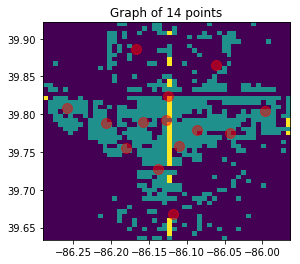

[1.5073846136133682, 175.0]
[1.505327975508885, 195.0]
[1.4569081138787312, 214.0]
[1.4931762940427067, 232.0]
[1.461139793080059, 228.0]
Iteration:  3


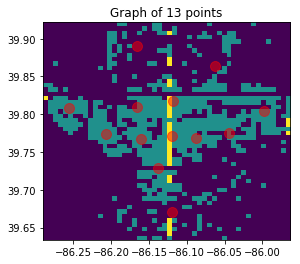

[1.520853651847698, 175.0]
[1.5142844873451804, 195.0]
[1.6148301537868617, 214.0]
[1.5087795596150986, 210.0]
[1.5847067126903422, 205.5]
Iteration:  4


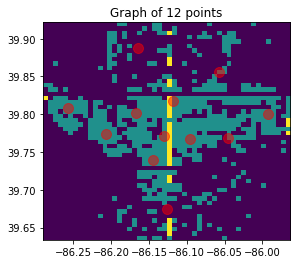

[1.614764579224241, 175.0]
[1.604257876591732, 195.0]
[1.686959966902668, 214.0]
[1.6039872775677817, 212.0]
[1.6815942012996616, 207.5]
Iteration:  4


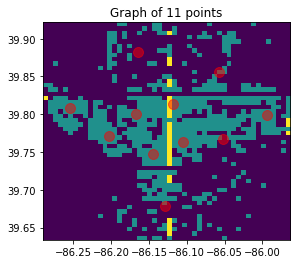

[1.6994051724132286, 175.0]
[1.6949763552331905, 195.0]
[1.7896734562596603, 214.0]
[1.6944378862578178, 212.0]
[1.8953287424223602, 207.5]
Iteration:  4


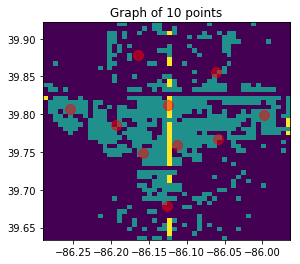

[1.8045333447283027, 175.0]
[1.8011201786316555, 195.0]
[1.8521023171725235, 214.0]
[1.799620380119999, 213.0]
[2.1012459830137704, 208.5]
Iteration:  4


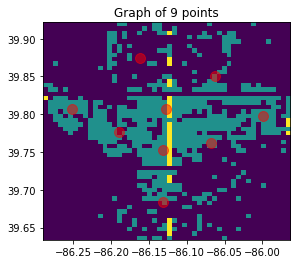

[1.9444446971536842, 175.0]
[1.941388563812559, 195.0]
[2.136711155561569, 214.0]
[1.9374714734071665, 212.0]
[2.0031139218033096, 207.5]
Iteration:  4


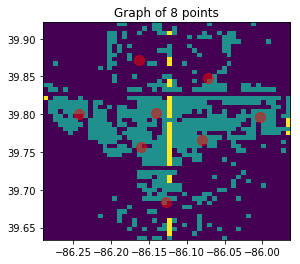

[2.2707435839639554, 175.0]
[2.2640873824248597, 195.0]
[2.1876684074680264, 214.0]
[2.2598237233805083, 232.0]
[2.176939407809897, 228.0]
Iteration:  5


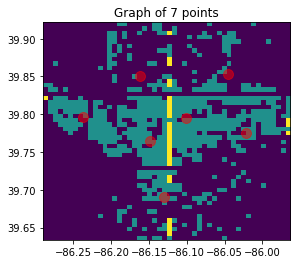

[2.33702916975592, 175.0]
[2.3379818672190558, 195.0]
[2.2938454657468608, 193.0]
[2.3383075242291698, 188.25]
[2.333025067092324, 191.25]
Iteration:  3


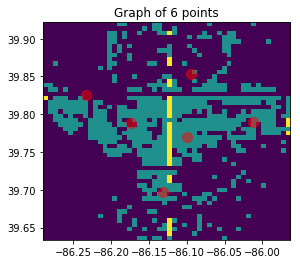

[2.94320177256321, 175.0]
[2.6832632537868926, 195.0]
[2.5420387539862195, 214.0]
[2.6675806161175837, 232.0]
[2.4625987928988518, 229.0]
Iteration:  5


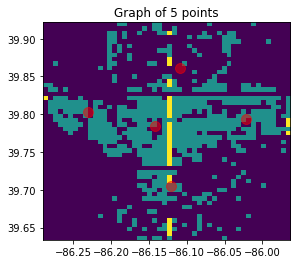

In [189]:
all_driving = np.empty ([0])
for x in range (10):
    #point weighted by intensity
    point = np.random.choice(np.arange(len(data)), replace = False, size = 1, p = data [:,2] / sum(data [:,2]))
    emergency = data [point, 0:2]
    emergency = emergency.flatten()

    #find closest center
    mindist = 9999
    for i in range (len(centers)):
        dist = la.norm (centers [i, 0:2] - emergency)
        if (dist < mindist):
            mindist = dist
            truck_point = centers [i, 0:2]
            pos = i
    centers = np.delete (centers, pos, 0)        
    #find driving distance to that point
    driving_distance = cluster.driving_distance (emergency, truck_point)
    all_driving = np.append (all_driving, driving_distance)
    
    cluster = Cluster(grid_loc, n = len(centers))
    cluster.set_centers (centers[:,0:2], len(centers))
    lam = cluster.learn_lam(n_iter = 5, rand_centers = False)
    cluster.round_off()
    #cluster.process_data_kmeans(True)
    centers = cluster.get_centers()
    
    heatmap, xedges, yedges = np.histogram2d(data[:,1], data[:,0], bins = bincount)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    plt.clf()
    plt.title ('Graph of {} points'.format(str(len(centers))))
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.scatter(centers[:,1], centers[:,0], c = 'red', s = 100, alpha = 0.5)
    plt.show()
    plt.close()

[2.323 5.645 1.407 1.424 1.579 5.328 4.252 6.013 3.429 0.787] 3.2186999999999997


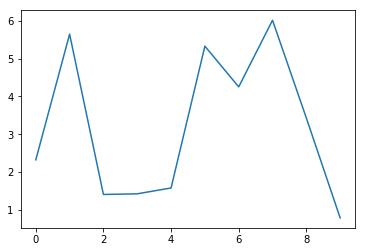

In [190]:
print(all_driving,all_driving.mean())
plt.plot(all_driving)

In [191]:
all_driving = all_driving * 0.621371

[1.44344483 3.50763929 0.874269   0.8848323  0.98114481 3.31066469
 2.64206949 3.73630382 2.13068116 0.48901898] 2.0000068377


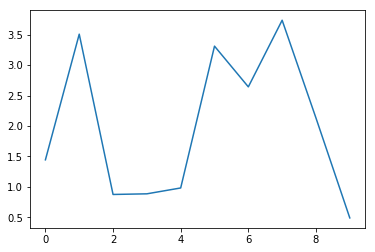

In [192]:
print(all_driving,all_driving.mean())
plt.plot(all_driving)

In [111]:
(data [:,2] / sum(data [:,2])).mean()

0.00142857142857143

In [113]:
np.amax(data [:,2] / sum(data [:,2]))

0.009451741715116395

In [114]:
np.amin(data [:,2] / sum(data [:,2]))

2.1594211457090385e-06

In [140]:
points = np.random.choice(np.arange(len(data)), replace = True, size = 20, p = data [:,2] / sum(data [:,2]))

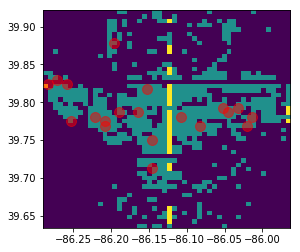

In [142]:
heatmap, xedges, yedges = np.histogram2d(data[:,1], data[:,0], bins = bincount)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.scatter(data[points,1], data[points,0], c = 'red', s = 100, alpha = 0.5)
plt.show()
plt.close()